Copyright (C) 2021 FeatSet+  

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.
 
This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

# Classification Models from Sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import time

from sklearn.model_selection  import train_test_split
from sklearn.preprocessing    import StandardScaler
from sklearn.metrics          import precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix


from sklearn.neighbors        import (KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid)
from sklearn.linear_model     import (LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDClassifier)
from sklearn.svm              import (LinearSVC, NuSVC, SVC)
from sklearn.tree             import (DecisionTreeClassifier, ExtraTreeClassifier)
from sklearn.experimental     import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble         import (RandomForestClassifier,  AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier)
from sklearn.naive_bayes      import (GaussianNB, BernoulliNB, CategoricalNB, ComplementNB, MultinomialNB)
from sklearn.neural_network   import (MLPClassifier)
from sklearn.gaussian_process import (GaussianProcessClassifier)

import warnings

## Create a dict with the evaluated classifiers

In [2]:
def initializeClassifiers():
    # Global Random State
    global_random_state = 78

    # Dict to navigate on docs
    vanilla_classifiers = {
        'KNeighbors':         KNeighborsClassifier(),
        'NearestCentroid':              NearestCentroid(),
        'LogisticRegression':           LogisticRegression(random_state=global_random_state),
        'PassiveAggressive':  PassiveAggressiveClassifier(random_state=global_random_state),
        'Perceptron':                   Perceptron(random_state=global_random_state),
        'Ridge':              RidgeClassifier(random_state=global_random_state),
        'SGD':                SGDClassifier(random_state=global_random_state),
        'LinearSVC':                    LinearSVC(random_state=global_random_state),
        'SVC':                          SVC(random_state=global_random_state),
        'DecisionTree':       DecisionTreeClassifier(random_state=global_random_state),
        'ExtraTree':          ExtraTreeClassifier(random_state=global_random_state),
        'GradientBoosting':   GradientBoostingClassifier(random_state=global_random_state),
        'BernoulliNB':                  BernoulliNB(),
        'MLP':                MLPClassifier(random_state=global_random_state),
    }

    return vanilla_classifiers

## Iterate over the dict, fitting the models

In [3]:
dataset = ['ds-BoWFire', 'ds-Flickr-Fire', 'ds-LibraGestures', 'ds-Food5k',
           'ds-FlickrFireSmoke', 'ds-CUB-200-2011', 'ds-Letters', 'ds-Food-11',
           'ds-Dogs', 'ds-AwA', 'ds-MNIST']

path = 'featset+_csv/'
featpath = 'CL'

# Ignore warnings
warnings.filterwarnings("ignore")

## Define evaluation measures

In [4]:
def evaluate(model, dataset, X, y, details=''):
    # Get Predictions
    start = time.time()
    y_hat = model.predict(X)
    end   = time.time()
    
    y_gt = y

    # Generate metrics
    metrics = dict()
    metrics['dataset'] = dataset
    metrics['Precision'] = precision_score(y_gt, y_hat, average='macro')
    metrics['F1']        = f1_score(y_gt, y_hat, average='macro')
    metrics['F1_Macro']  = f1_score(y_gt, y_hat, average='macro')
    metrics['Recall']    = recall_score(y_gt, y_hat, average='macro')
    conf_matrix          = confusion_matrix(y_gt, y_hat).ravel()
    metrics['TN']        = conf_matrix[0]
    metrics['FP']        = conf_matrix[1]
    metrics['FN']        = conf_matrix[2]
    metrics['TP']        = conf_matrix[3]
    metrics['details']   = details
    
    metrics['time (s)']  = "{:.3f}".format(end - start)
    
    return metrics

## Run classifiers and evaluate fitted models

In [5]:
df_metrics = pd.DataFrame(columns=['dataset', 'time (s)', 'Precision', 'Recall', 'F1',
                                    'F1_Macro', 'AUC', 'TN', 'FP', 'FN', 'TP', 'details'])

# For each dataset, run classifiers and save results
for ds in dataset:
    print('\n\n' + str(ds) + ' >>> ')
    vanilla_classifiers = initializeClassifiers()
    
    X = pd.read_csv(path + ds + '_' + featpath + '.csv', sep=',')
    # Ignore first column (OID)
    X.drop(['OID'], axis=1, inplace=True)
    
    y = pd.read_csv(path + ds + '.csv')
    
    if (str(ds) == str('ds-FlickrFireSmoke')): # ds-FlickrFireSmoke has two classes
        y = y['class_1']
    else:
        y = y['class']
    
    # Preprocess dataset, split into training and test parts
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=.4, random_state=42)

    for key, classifier in vanilla_classifiers.items():
        print(key, end='  ')
        classifier.fit(X_train, y_train)

    # For key, model in trained_models.items():
    for key, model in vanilla_classifiers.items():
        try:
            df_metrics = df_metrics.append(evaluate(model, ds, X_test, y_test.values[:], details=key), ignore_index=True)     
        except Exception as err:
            print(f'Skipping {key} due to {str(err)}')

display(df_metrics)

df_metrics.to_csv('ClassificationResults-AllDatasets-CL.csv')



ds-BoWFire >>> 
KNeighbors  NearestCentroid  LogisticRegression  PassiveAggressive  Perceptron  Ridge  SGD  LinearSVC  SVC  DecisionTree  ExtraTree  GradientBoosting  BernoulliNB  MLP  

ds-Flickr-Fire >>> 
KNeighbors  NearestCentroid  LogisticRegression  PassiveAggressive  Perceptron  Ridge  SGD  LinearSVC  SVC  DecisionTree  ExtraTree  GradientBoosting  BernoulliNB  MLP  

ds-LibraGestures >>> 
KNeighbors  NearestCentroid  LogisticRegression  PassiveAggressive  Perceptron  Ridge  SGD  LinearSVC  SVC  DecisionTree  ExtraTree  GradientBoosting  BernoulliNB  MLP  

ds-Food5k >>> 
KNeighbors  NearestCentroid  LogisticRegression  PassiveAggressive  Perceptron  Ridge  SGD  LinearSVC  SVC  DecisionTree  ExtraTree  GradientBoosting  BernoulliNB  MLP  

ds-FlickrFireSmoke >>> 
KNeighbors  NearestCentroid  LogisticRegression  PassiveAggressive  Perceptron  Ridge  SGD  LinearSVC  SVC  DecisionTree  ExtraTree  GradientBoosting  BernoulliNB  MLP  

ds-CUB-200-2011 >>> 
KNeighbors  NearestCentro

,dataset,time (s),Precision,Recall,F1,F1_Macro,AUC,TN,FP,FN,TP,details
0,ds-BoWFire,0.006,0.599510,0.598639,0.593210,0.593210,NaN,26,23,14,28,KNeighbors
1,ds-BoWFire,0.001,0.524525,0.523810,0.515019,0.515019,NaN,21,28,16,26,NearestCentroid
2,ds-BoWFire,0.000,0.616779,0.617347,0.615199,0.615199,NaN,29,20,15,27,LogisticRegression
3,ds-BoWFire,0.000,0.522436,0.522109,0.521697,0.521697,NaN,29,20,23,19,PassiveAggressive
4,ds-BoWFire,0.000,0.455128,0.455782,0.449952,0.449952,NaN,19,30,20,22,Perceptron
...,...,...,...,...,...,...,...,...,...,...,...,...
149,ds-MNIST,0.009,0.524292,0.524441,0.524298,0.524298,NaN,1611,18,258,122,DecisionTree
150,ds-MNIST,0.011,0.420240,0.421476,0.420790,0.420790,NaN,1298,20,313,178,ExtraTree
151,ds-MNIST,0.418,0.653734,0.652786,0.649741,0.649741,NaN,1997,12,169,68,GradientBoosting
152,ds-MNIST,0.008,0.367658,0.366278,0.352862,0.352862,NaN,1129,228,219,270,BernoulliNB


## Save results to a csv file

In [6]:
df_metrics = pd.read_csv('ClassificationResults-AllDatasets-CL.csv')
display(df_metrics)

,Unnamed: 0,dataset,time (s),Precision,Recall,F1,F1_Macro,AUC,TN,FP,FN,TP,details
0,0,ds-BoWFire,0.006,0.599510,0.598639,0.593210,0.593210,NaN,26,23,14,28,KNeighbors
1,1,ds-BoWFire,0.001,0.524525,0.523810,0.515019,0.515019,NaN,21,28,16,26,NearestCentroid
2,2,ds-BoWFire,0.000,0.616779,0.617347,0.615199,0.615199,NaN,29,20,15,27,LogisticRegression
3,3,ds-BoWFire,0.000,0.522436,0.522109,0.521697,0.521697,NaN,29,20,23,19,PassiveAggressive
4,4,ds-BoWFire,0.000,0.455128,0.455782,0.449952,0.449952,NaN,19,30,20,22,Perceptron
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,149,ds-MNIST,0.009,0.524292,0.524441,0.524298,0.524298,NaN,1611,18,258,122,DecisionTree
150,150,ds-MNIST,0.011,0.420240,0.421476,0.420790,0.420790,NaN,1298,20,313,178,ExtraTree
151,151,ds-MNIST,0.418,0.653734,0.652786,0.649741,0.649741,NaN,1997,12,169,68,GradientBoosting
152,152,ds-MNIST,0.008,0.367658,0.366278,0.352862,0.352862,NaN,1129,228,219,270,BernoulliNB


ds-BoWFire   ds-Flickr-Fire   ds-LibraGestures   ds-Food5k   ds-FlickrFireSmoke   ds-CUB-200-2011   ds-Letters   ds-Food-11   ds-Dogs   ds-AwA   ds-MNIST   

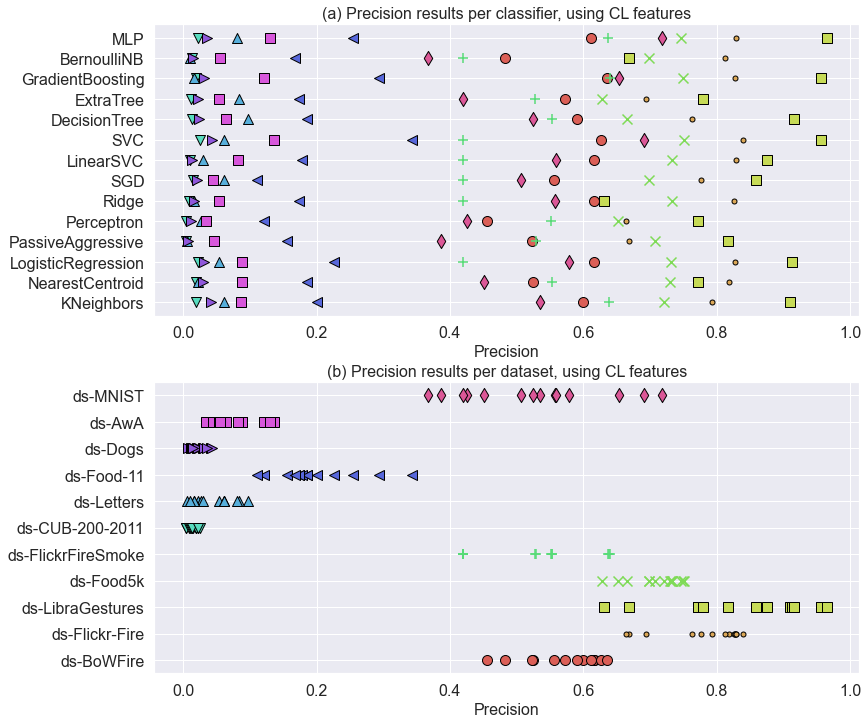

In [7]:
dsId = (df_metrics.index % len(df_metrics['dataset'].unique())).to_list()
msymbols = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
colors = sns.color_palette("hls", len(msymbols))
fs = 16

plt.figure(figsize=[12  , 10])

for i, ds in enumerate(df_metrics['dataset'].unique()):
    print(ds, end='   ')
    df_plot = df_metrics[df_metrics['dataset'] == ds]

    plt.subplot(2, 1, 1)
    plt.scatter(df_plot['Precision'], df_plot['details'], color=colors[i],
                marker=msymbols[i], s=100, edgecolors='black')
    
    plt.xticks(size=fs)
    plt.yticks(size=fs)
    plt.xlabel('Precision', size=fs)
    plt.title('(a) Precision results per classifier, using CL features', size=fs)

    plt.subplot(2, 1, 2)
    plt.scatter(df_plot['Precision'], df_plot['dataset'], color=colors[i],
                marker=msymbols[i], s=100, edgecolors='black')
    
    plt.xticks(size=fs)
    plt.yticks(size=fs)
    plt.xlabel('Precision', size=fs)
    plt.title('(b) Precision results per dataset, using CL features', size=fs)

plt.tight_layout(pad=0.4)
plt.savefig('AllClassifiersAndDatasets-Precision.png', dpi=500)

plt.show()

In [8]:
df_metrics_ds = pd.DataFrame(columns=['dataset', 'time (s)', 'Precision', 'Recall', 'F1',
                                    'F1_Macro', 'AUC', 'TN', 'FP', 'FN', 'TP', 'details'])
dfFEM = pd.DataFrame(columns=['FEM'])

femNames = ['CL', 'CS', 'CT', 'EH', 'Hr', 'SC', 'TS', 'LBP',
            'BIC', 'TCH', 'NCH8', 'NCH16', 'NCH32', 'NCH64',
            'NCH128', 'NCH256']
ds = dataset[0]

for f, fem in enumerate(femNames):
    vanilla_classifiers = initializeClassifiers()
    
    print('\n\n' + fem, end=' >>> ')
    X = pd.read_csv(path + ds + '_' + fem + '.csv', sep=',')
    # Ignore first column (OID)
    X.drop(['OID'], axis=1, inplace=True)
    
    y = pd.read_csv(path + ds + '.csv')
    
    if (str(ds) == str('ds-FlickrFireSmoke')): # ds-FlickrFireSmoke has two classes
        y = y['class_1']
    else:
        y = y['class']
    
    # Preprocess dataset, split into training and test parts
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=.4, random_state=42)

    for key, classifier in vanilla_classifiers.items():
        print(key, end=' || ')
        classifier.fit(X_train, y_train)

    # For key, model in trained_models.items():
    for key, model in vanilla_classifiers.items():
        try:
            df_metrics_ds = df_metrics_ds.append(evaluate(model, fem, X_test,
                                                          y_test.values[:], details=key), ignore_index=True)     
        except Exception as err:
            print(f'Skipping {key} due to {str(err)}')

df_metrics_ds.rename(columns = {'dataset': 'FEM'}, inplace = True)
display(df_metrics_ds)



CL >>> KNeighbors || NearestCentroid || LogisticRegression || PassiveAggressive || Perceptron || Ridge || SGD || LinearSVC || SVC || DecisionTree || ExtraTree || GradientBoosting || BernoulliNB || MLP || 

CS >>> KNeighbors || NearestCentroid || LogisticRegression || PassiveAggressive || Perceptron || Ridge || SGD || LinearSVC || SVC || DecisionTree || ExtraTree || GradientBoosting || BernoulliNB || MLP || 

CT >>> KNeighbors || NearestCentroid || LogisticRegression || PassiveAggressive || Perceptron || Ridge || SGD || LinearSVC || SVC || DecisionTree || ExtraTree || GradientBoosting || BernoulliNB || MLP || 

EH >>> KNeighbors || NearestCentroid || LogisticRegression || PassiveAggressive || Perceptron || Ridge || SGD || LinearSVC || SVC || DecisionTree || ExtraTree || GradientBoosting || BernoulliNB || MLP || 

Hr >>> KNeighbors || NearestCentroid || LogisticRegression || PassiveAggressive || Perceptron || Ridge || SGD || LinearSVC || SVC || DecisionTree || ExtraTree || GradientBoos

,FEM,time (s),Precision,Recall,F1,F1_Macro,AUC,TN,FP,FN,TP,details
0,CL,0.005,0.599510,0.598639,0.593210,0.593210,NaN,26,23,14,28,KNeighbors
1,CL,0.000,0.524525,0.523810,0.515019,0.515019,NaN,21,28,16,26,NearestCentroid
2,CL,0.000,0.616779,0.617347,0.615199,0.615199,NaN,29,20,15,27,LogisticRegression
3,CL,0.000,0.522436,0.522109,0.521697,0.521697,NaN,29,20,23,19,PassiveAggressive
4,CL,0.000,0.455128,0.455782,0.449952,0.449952,NaN,19,30,20,22,Perceptron
...,...,...,...,...,...,...,...,...,...,...,...,...
219,NCH256,0.000,0.525436,0.525510,0.525409,0.525409,NaN,27,22,21,21,DecisionTree
220,NCH256,0.000,0.540698,0.540816,0.538406,0.538406,NaN,25,24,18,24,ExtraTree
221,NCH256,0.001,0.619048,0.619048,0.615385,0.615385,NaN,28,21,14,28,GradientBoosting
222,NCH256,0.000,0.629040,0.624150,0.613705,0.613705,NaN,25,24,11,31,BernoulliNB


CL   CS   CT   EH   Hr   SC   TS   LBP   BIC   TCH   NCH8   NCH16   NCH32   NCH64   NCH128   NCH256   

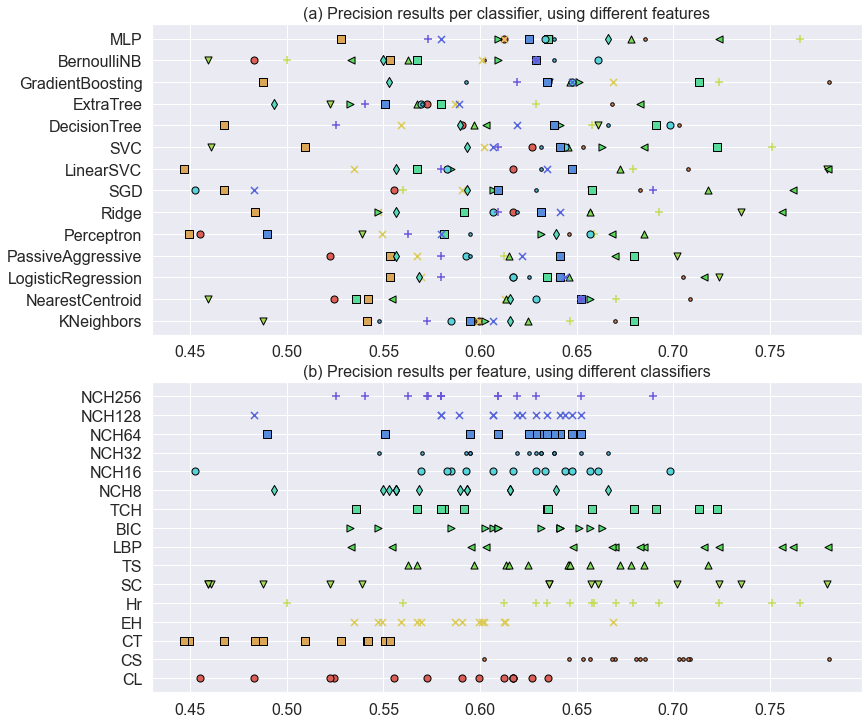

In [9]:
msymbols = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd', 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']

femNames = ['CL', 'CS', 'CT', 'EH', 'Hr', 'SC', 'TS', 'LBP',
            'BIC', 'TCH', 'NCH 8', 'NCH 16', 'NCH 32',
            'NCH 64', 'NCH 128', 'NCH 256']

colors = sns.color_palette("hls", len(msymbols))

fs = 16

plt.figure(figsize=[12  , 10])

for i, fem in enumerate(df_metrics_ds['FEM'].unique()):
    print(fem, end='   ')
    df_plot = df_metrics_ds[df_metrics_ds['FEM'] == fem]

    plt.subplot(2, 1, 1)
    plt.scatter(df_plot['Precision'], df_plot['details'], color=colors[i], marker=msymbols[i], s=50, edgecolors='black')
    plt.title('(a) Precision results per classifier, using different features', size=fs)
    plt.xticks(size=fs)
    plt.yticks(size=fs)

    plt.subplot(2, 1, 2)
    plt.scatter(df_plot['Precision'], df_plot['FEM'], color=colors[i], marker=msymbols[i], s=50, edgecolors='black')
    plt.title('(b) Precision results per feature, using different classifiers', size=fs)
    plt.xticks(size=fs)
    plt.yticks(size=fs)

plt.tight_layout(pad=0.4)
plt.savefig('AllClassifiersAndFeatures-Precision.png', dpi=500) # ds 0

plt.show()

CL   CS   CT   EH   Hr   SC   TS   LBP   BIC   TCH   NCH8   NCH16   NCH32   NCH64   NCH128   NCH256   

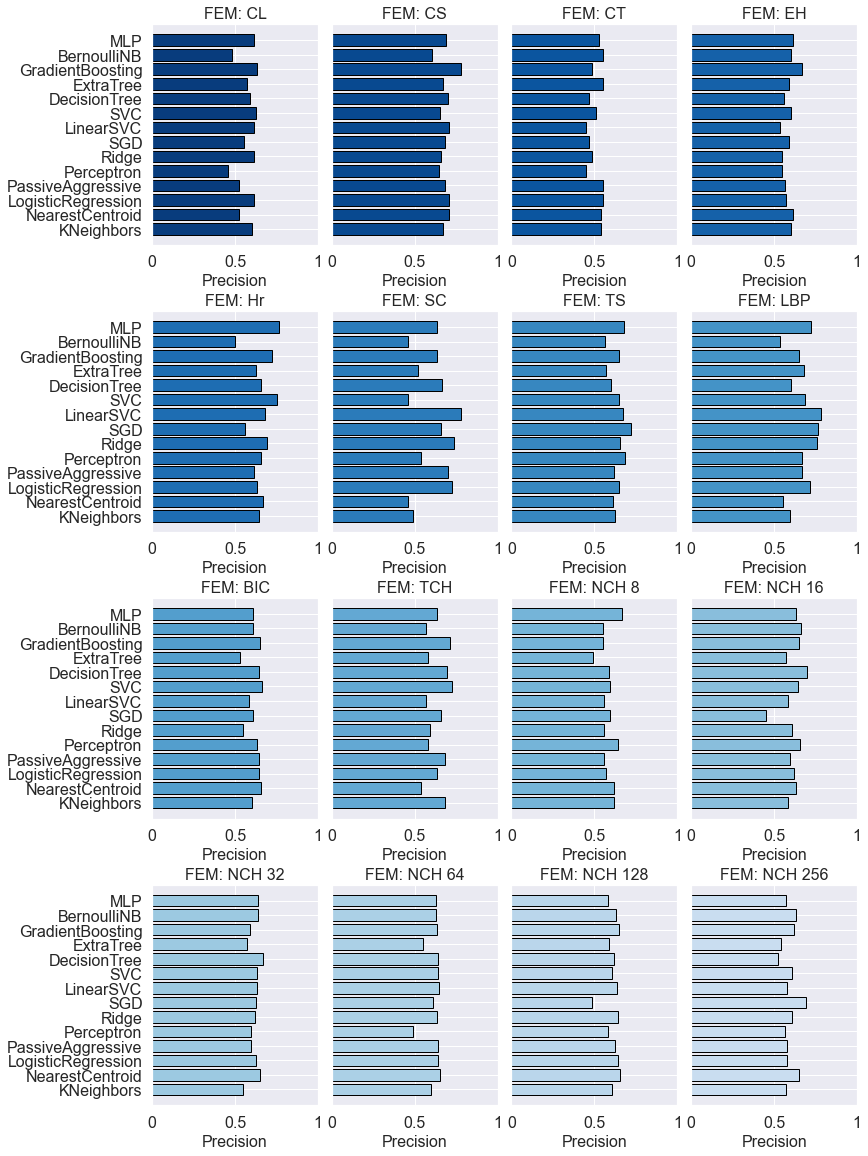

In [10]:
msymbols = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd', 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
colors = sns.color_palette("Blues_r", len(femNames)+4)

fs = 16

plt.figure(figsize=[12, 16])

for i, fem in enumerate(df_metrics_ds['FEM'].unique()):
    plt.subplot(4, 4, i+1)
    print(fem, end='   ')
    df_plot = df_metrics_ds[df_metrics_ds['FEM'] == fem]

    # plt.scatter(df_plot['Precision'], df_plot['details'], color=colors[i], marker=msymbols[i], s=100, edgecolors='black')
    plt.barh(df_plot['details'], df_plot['Precision'], color=colors[i], ec='black')

    ax = plt.gca()

    if (i%4!=0):
        # plt.yticks([])
        ax.axes.yaxis.set_ticklabels([])
    else:
        plt.yticks(size=fs)

    # ax.axes.xaxis.set_ticklabels([])
    plt.xlabel('Precision', size=fs)
    plt.xlim(0, 1)
    plt.xticks([0, 0.5, 1], ['0', '0.5', '1'])
    
    plt.grid(True)
    plt.xticks(size=fs)
    plt.title('FEM: ' + str(femNames[i]), size=fs)


plt.tight_layout(pad=0.4)

plt.savefig('BowF-FEMs-ClassificationPrecision.png', dpi=500)
plt.show()